In [67]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

/kaggle/input/heartcsv/Heart.csv


In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartcsv/Heart.csv


In [69]:
df=pd.read_csv('/kaggle/input/heartcsv/Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [70]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  303
Columns  :  15

Features : 
 ['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']

Missing values :   6

Unique values :  
 Unnamed: 0    303
Age            41
Sex             2
ChestPain       4
RestBP         50
Chol          152
Fbs             2
RestECG         3
MaxHR          91
ExAng           2
Oldpeak        40
Slope           3
Ca              4
Thal            3
AHD             2
dtype: int64


In [71]:
df.AHD.unique()

array(['No', 'Yes'], dtype=object)

In [72]:
# Map "Yes" to 1 and "No" to 0
mapping = {'Yes': 1, 'No': 0}
df['AHD'] = df['AHD'].map(mapping)

In [73]:
df.AHD.unique()

array([0, 1])

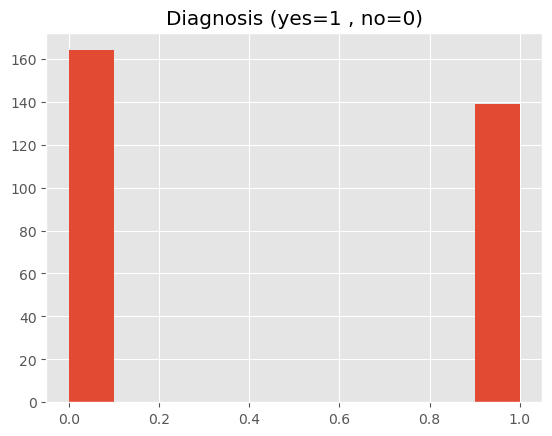

In [74]:
df.describe()
plt.hist(df['AHD'])
plt.title('Diagnosis (yes=1 , no=0)')
plt.show()

In [75]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [76]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [77]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [78]:
# Example DataFrame
import pandas as pd


# Map one part to 1 and the other part to 0
df['ChestPain'] = df['ChestPain'].map(lambda x: 1 if x in ['asymptomatic'] else 0)
df['ChestPain']


0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    1
300    1
301    0
302    0
Name: ChestPain, Length: 303, dtype: int64

In [79]:
# Example DataFrame
import pandas as pd


# Map one part to 1 and the other part to 0
df['Thal'] = df['Thal'].map(lambda x: 1 if x in ['normal'] else 0)
df['ChestPain']

0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    1
300    1
301    0
302    0
Name: ChestPain, Length: 303, dtype: int64

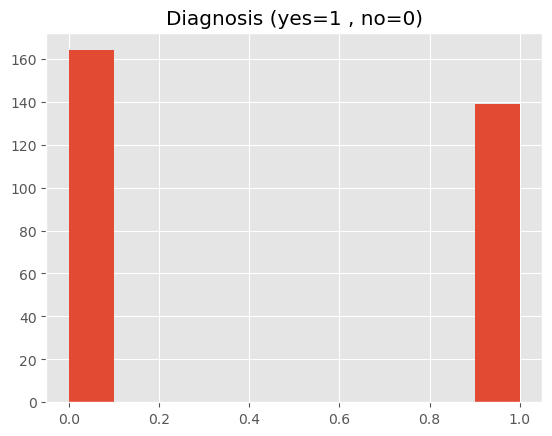

In [80]:
df.describe()
plt.hist(df['AHD'])
plt.title('Diagnosis (yes=1 , no=0)')
plt.show()

In [81]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,0,1
3,4,37,1,0,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,0,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,0,110,264,0,0,132,0,1.2,2,0.0,0,1
299,300,68,1,1,144,193,1,0,141,0,3.4,2,2.0,0,1
300,301,57,1,1,130,131,0,0,115,1,1.2,2,1.0,0,1
301,302,57,0,0,130,236,0,2,174,0,0.0,2,1.0,1,1


In [82]:
nan_mask = df.isna()

# Identify which columns contain NaN values
nan_columns = nan_mask.any(axis=0)

# Print the columns containing NaN values
print(nan_columns)

Unnamed: 0    False
Age           False
Sex           False
ChestPain     False
RestBP        False
Chol          False
Fbs           False
RestECG       False
MaxHR         False
ExAng         False
Oldpeak       False
Slope         False
Ca             True
Thal          False
AHD           False
dtype: bool


In [83]:
# Identify which row(s) in column 'B' contain NaN values
nan_mask = df['Ca'].isna()
nan_indices = nan_mask[nan_mask].index

# Print the row indices containing NaN values in column 'B'
print(nan_indices)

Int64Index([166, 192, 287, 302], dtype='int64')


In [84]:
# Calculate the mean of column 'B'
mean_b = df['Ca'].mean()

# Print the mean of column 'B'
print(mean_b)

0.6722408026755853


In [85]:
df["Ca"] = df["Ca"].fillna(0.67)

In [86]:
nan_mask = df.isna()

# Identify which columns contain NaN values
nan_columns = nan_mask.any(axis=0)

# Print the columns containing NaN values
print(nan_columns)

Unnamed: 0    False
Age           False
Sex           False
ChestPain     False
RestBP        False
Chol          False
Fbs           False
RestECG       False
MaxHR         False
ExAng         False
Oldpeak       False
Slope         False
Ca            False
Thal          False
AHD           False
dtype: bool


In [87]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [88]:
X = df.drop(['AHD'], axis=1).values 
y = df['AHD'].values

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

LOGISTIOC REGRESSION

In [92]:
lr = LogisticRegression()

# train the model on the training set
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print(f'Accuracy score: {accuracy:.2f}')

# print the classification report
print(classification_report(y_test, y_pred))

Accuracy score: 0.91
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.94      0.85      0.89        34

    accuracy                           0.91        76
   macro avg       0.91      0.90      0.91        76
weighted avg       0.91      0.91      0.91        76



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


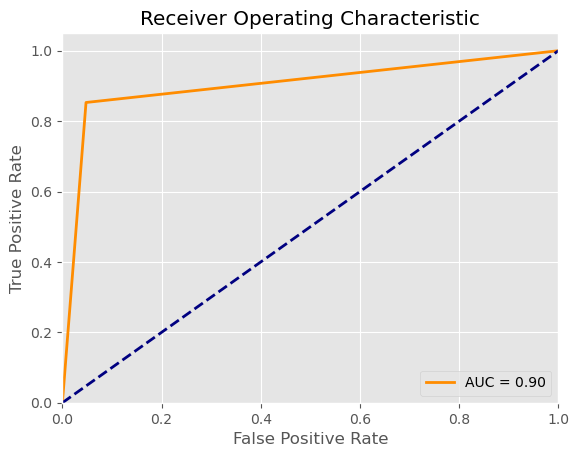

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the AUC score for the ROC curve
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NAIVE BAYES

In [94]:
nb = GaussianNB()

# train the model on the training set
nb.fit(X_train, y_train)

# make predictions on the testing set
y_pred_nb = nb.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_nb)

# print the accuracy score
print(f'Accuracy score: {accuracy:.2f}')

# print the classification report
print(classification_report(y_test, y_pred_nb))

Accuracy score: 0.92
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.94      0.88      0.91        34

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



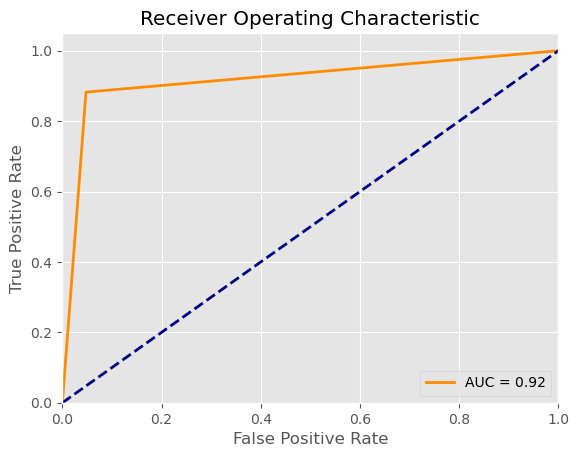

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)

# calculate the AUC score for the ROC curve
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

DECISION TREE

In [96]:
dtc = DecisionTreeClassifier()

# train the model on the training set
dtc.fit(X_train, y_train)

# make predictions on the testing set
y_pred_dt = dtc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_dt)

# print the accuracy score
print(f'Accuracy score: {accuracy:.2f}')

# print the classification report
print(classification_report(y_test, y_pred_dt))

Accuracy score: 0.80
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.77      0.79      0.78        34

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



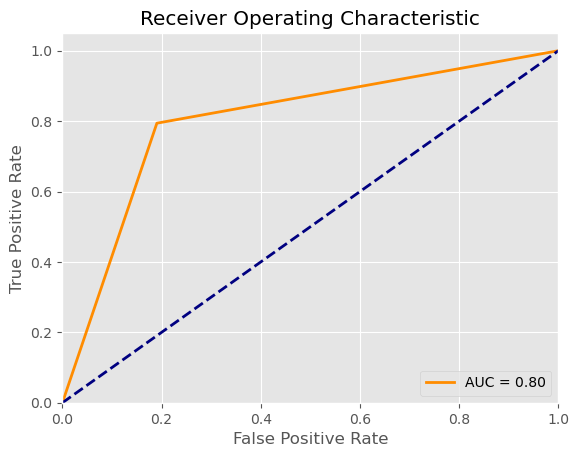

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# calculate the AUC score for the ROC curve
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

RANDOM FOREST

In [98]:
rfc = RandomForestClassifier()

# train the model on the training set
rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred_rf = rfc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)

# print the accuracy score
print(f'Accuracy score: {accuracy:.2f}')

# print the classification report
print(classification_report(y_test, y_pred_rf))

Accuracy score: 0.91
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.91      0.88      0.90        34

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



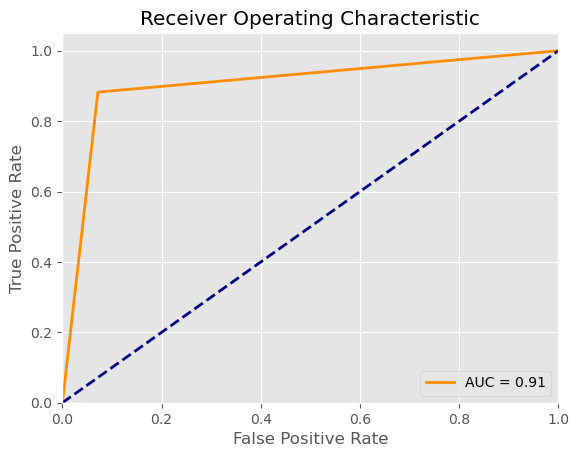

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# calculate the AUC score for the ROC curve
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()